#### 가능도함수

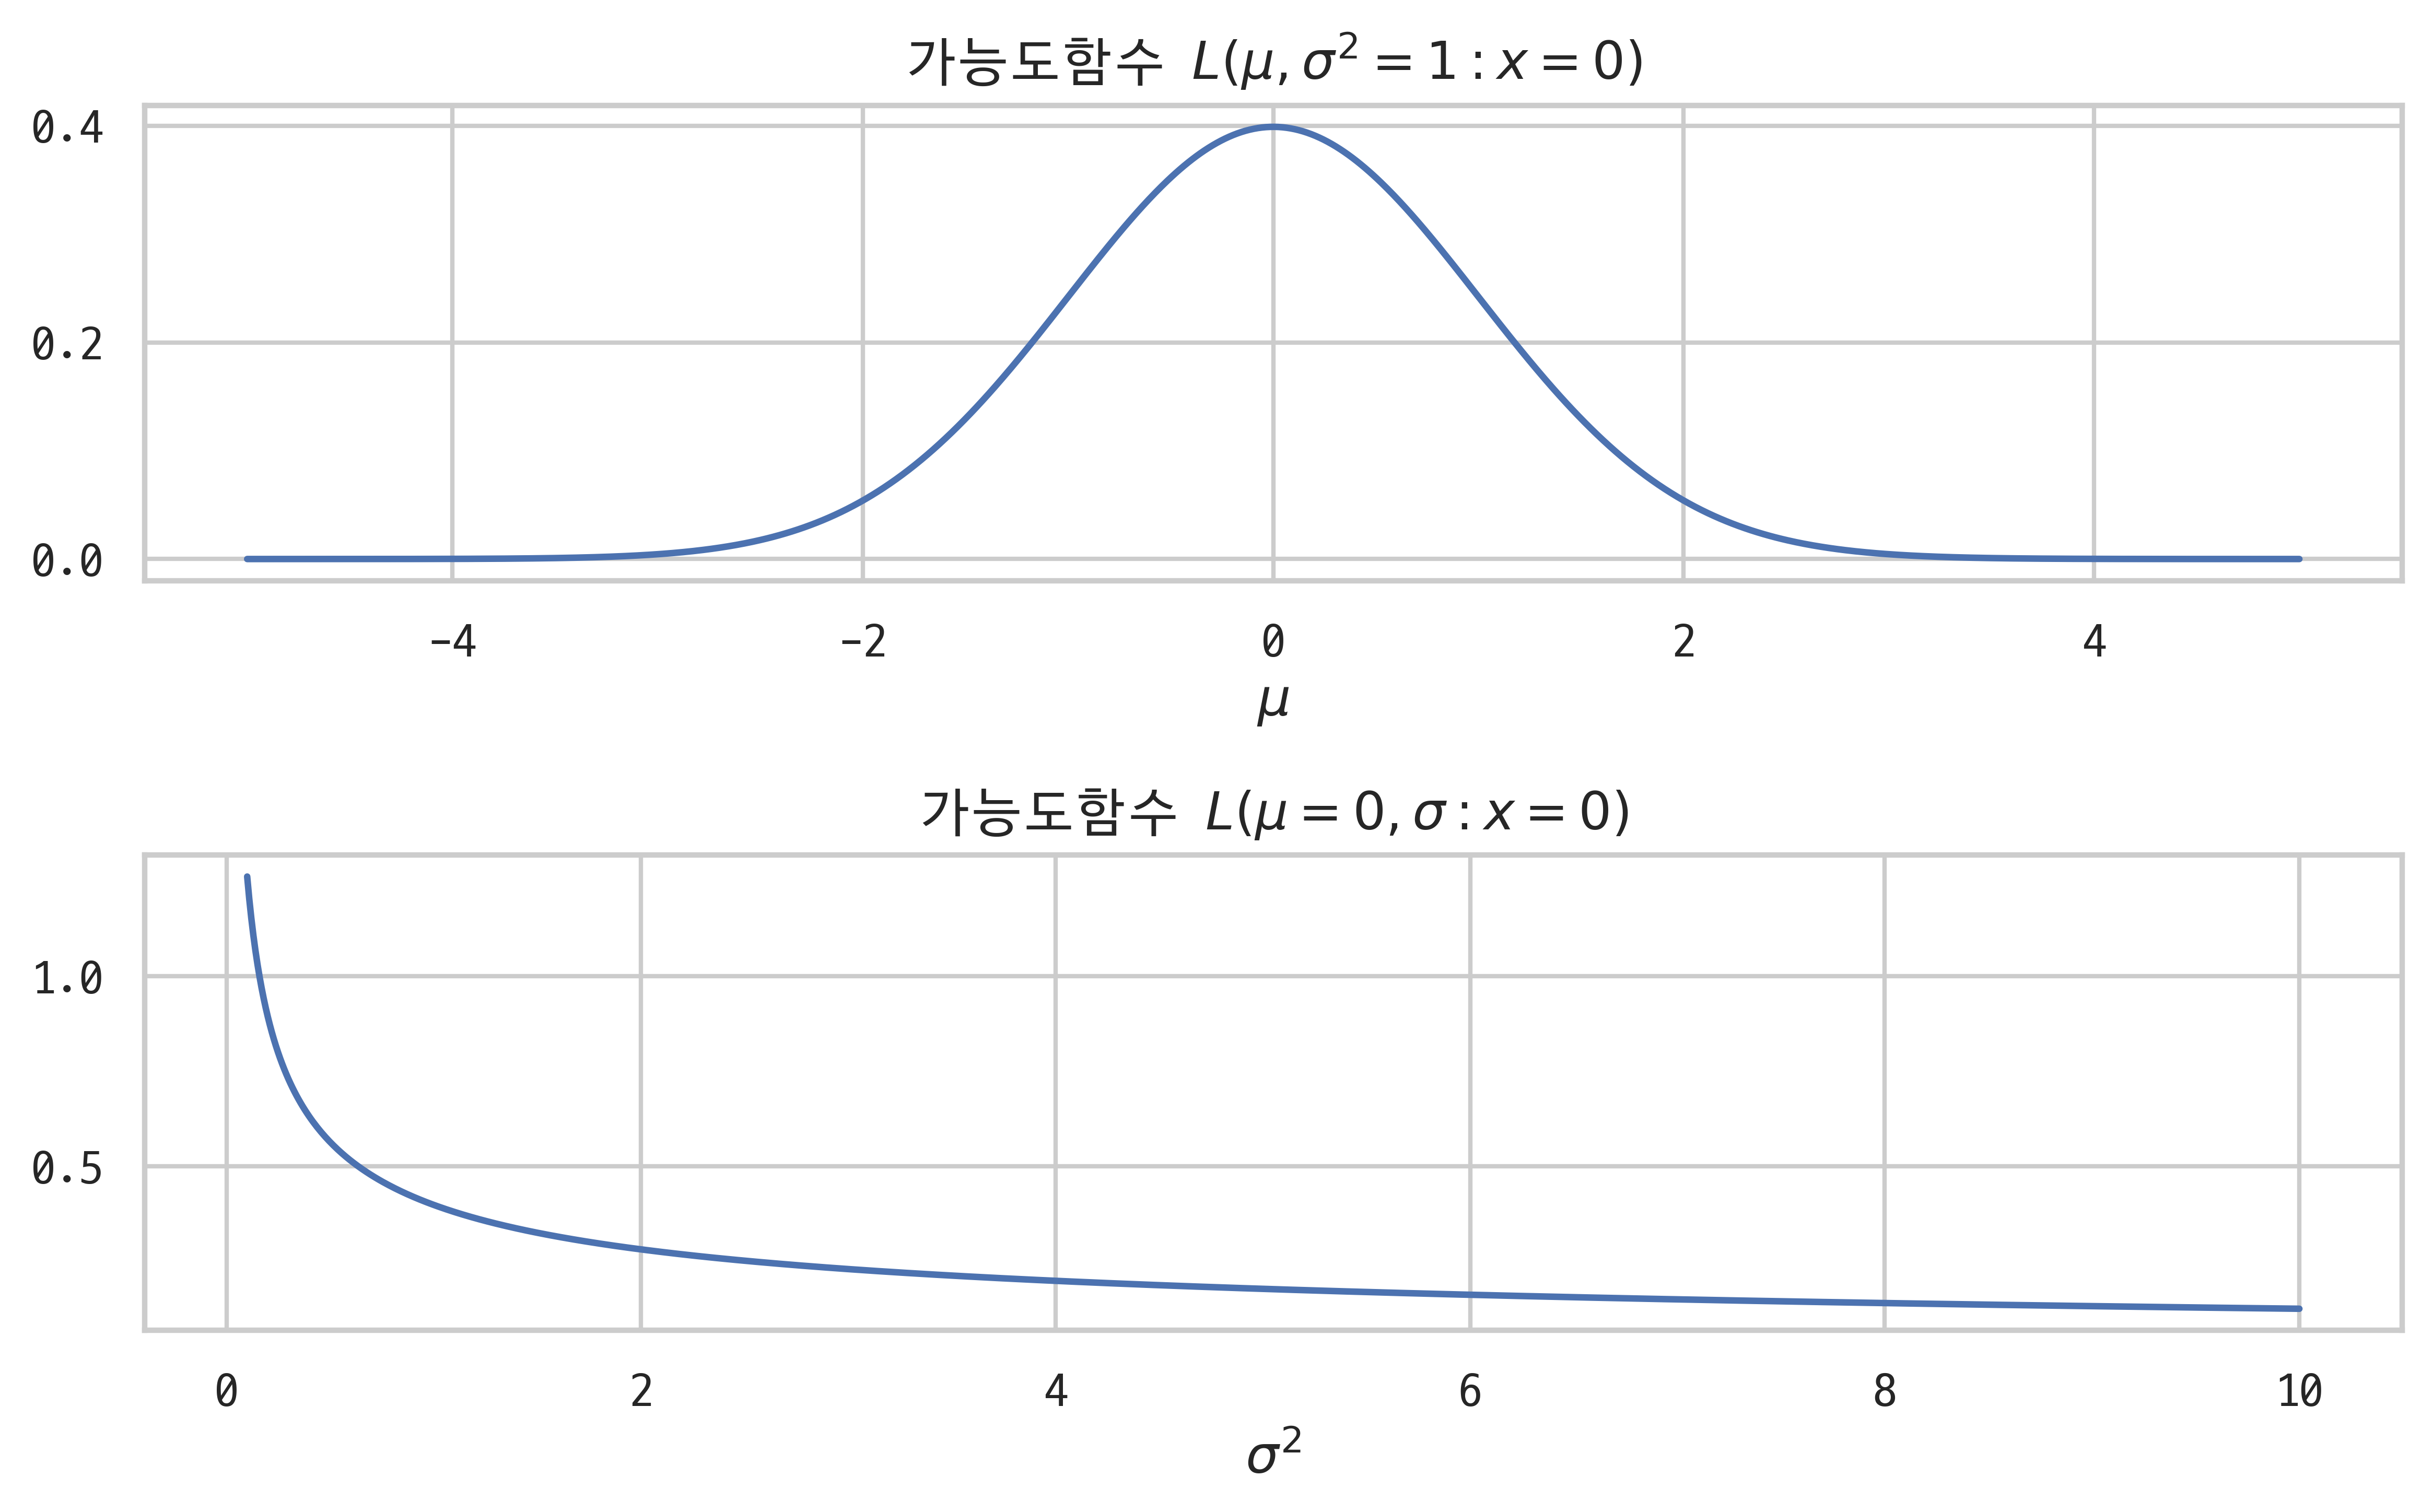

In [2]:
def likelihood_mu(mu):
    return sp.stats.norm(loc=mu).pdf(0)

mus = np.linspace(-5, 5, 1000)
likelihood_mu = [likelihood_mu(m) for m in mus]

plt.subplot(211)
plt.plot(mus, likelihood_mu)
plt.xlabel("$\mu$")
plt.title("가능도함수 $L(\mu, \sigma^2=1: x=0)$")


def likelihood_sigma2(sigma2):
    return sp.stats.norm(scale=np.sqrt(sigma2)).pdf(0)

sigma2s = np.linspace(0.1, 10, 1000)
likelihood_sigma2 = [likelihood_sigma2(s) for s in sigma2s]

plt.subplot(212)
plt.plot(sigma2s, likelihood_sigma2)
plt.xlabel("$\sigma^2$")
plt.title("가능도함수 $L(\mu=0, \sigma: x=0)$")

plt.tight_layout()
plt.show()

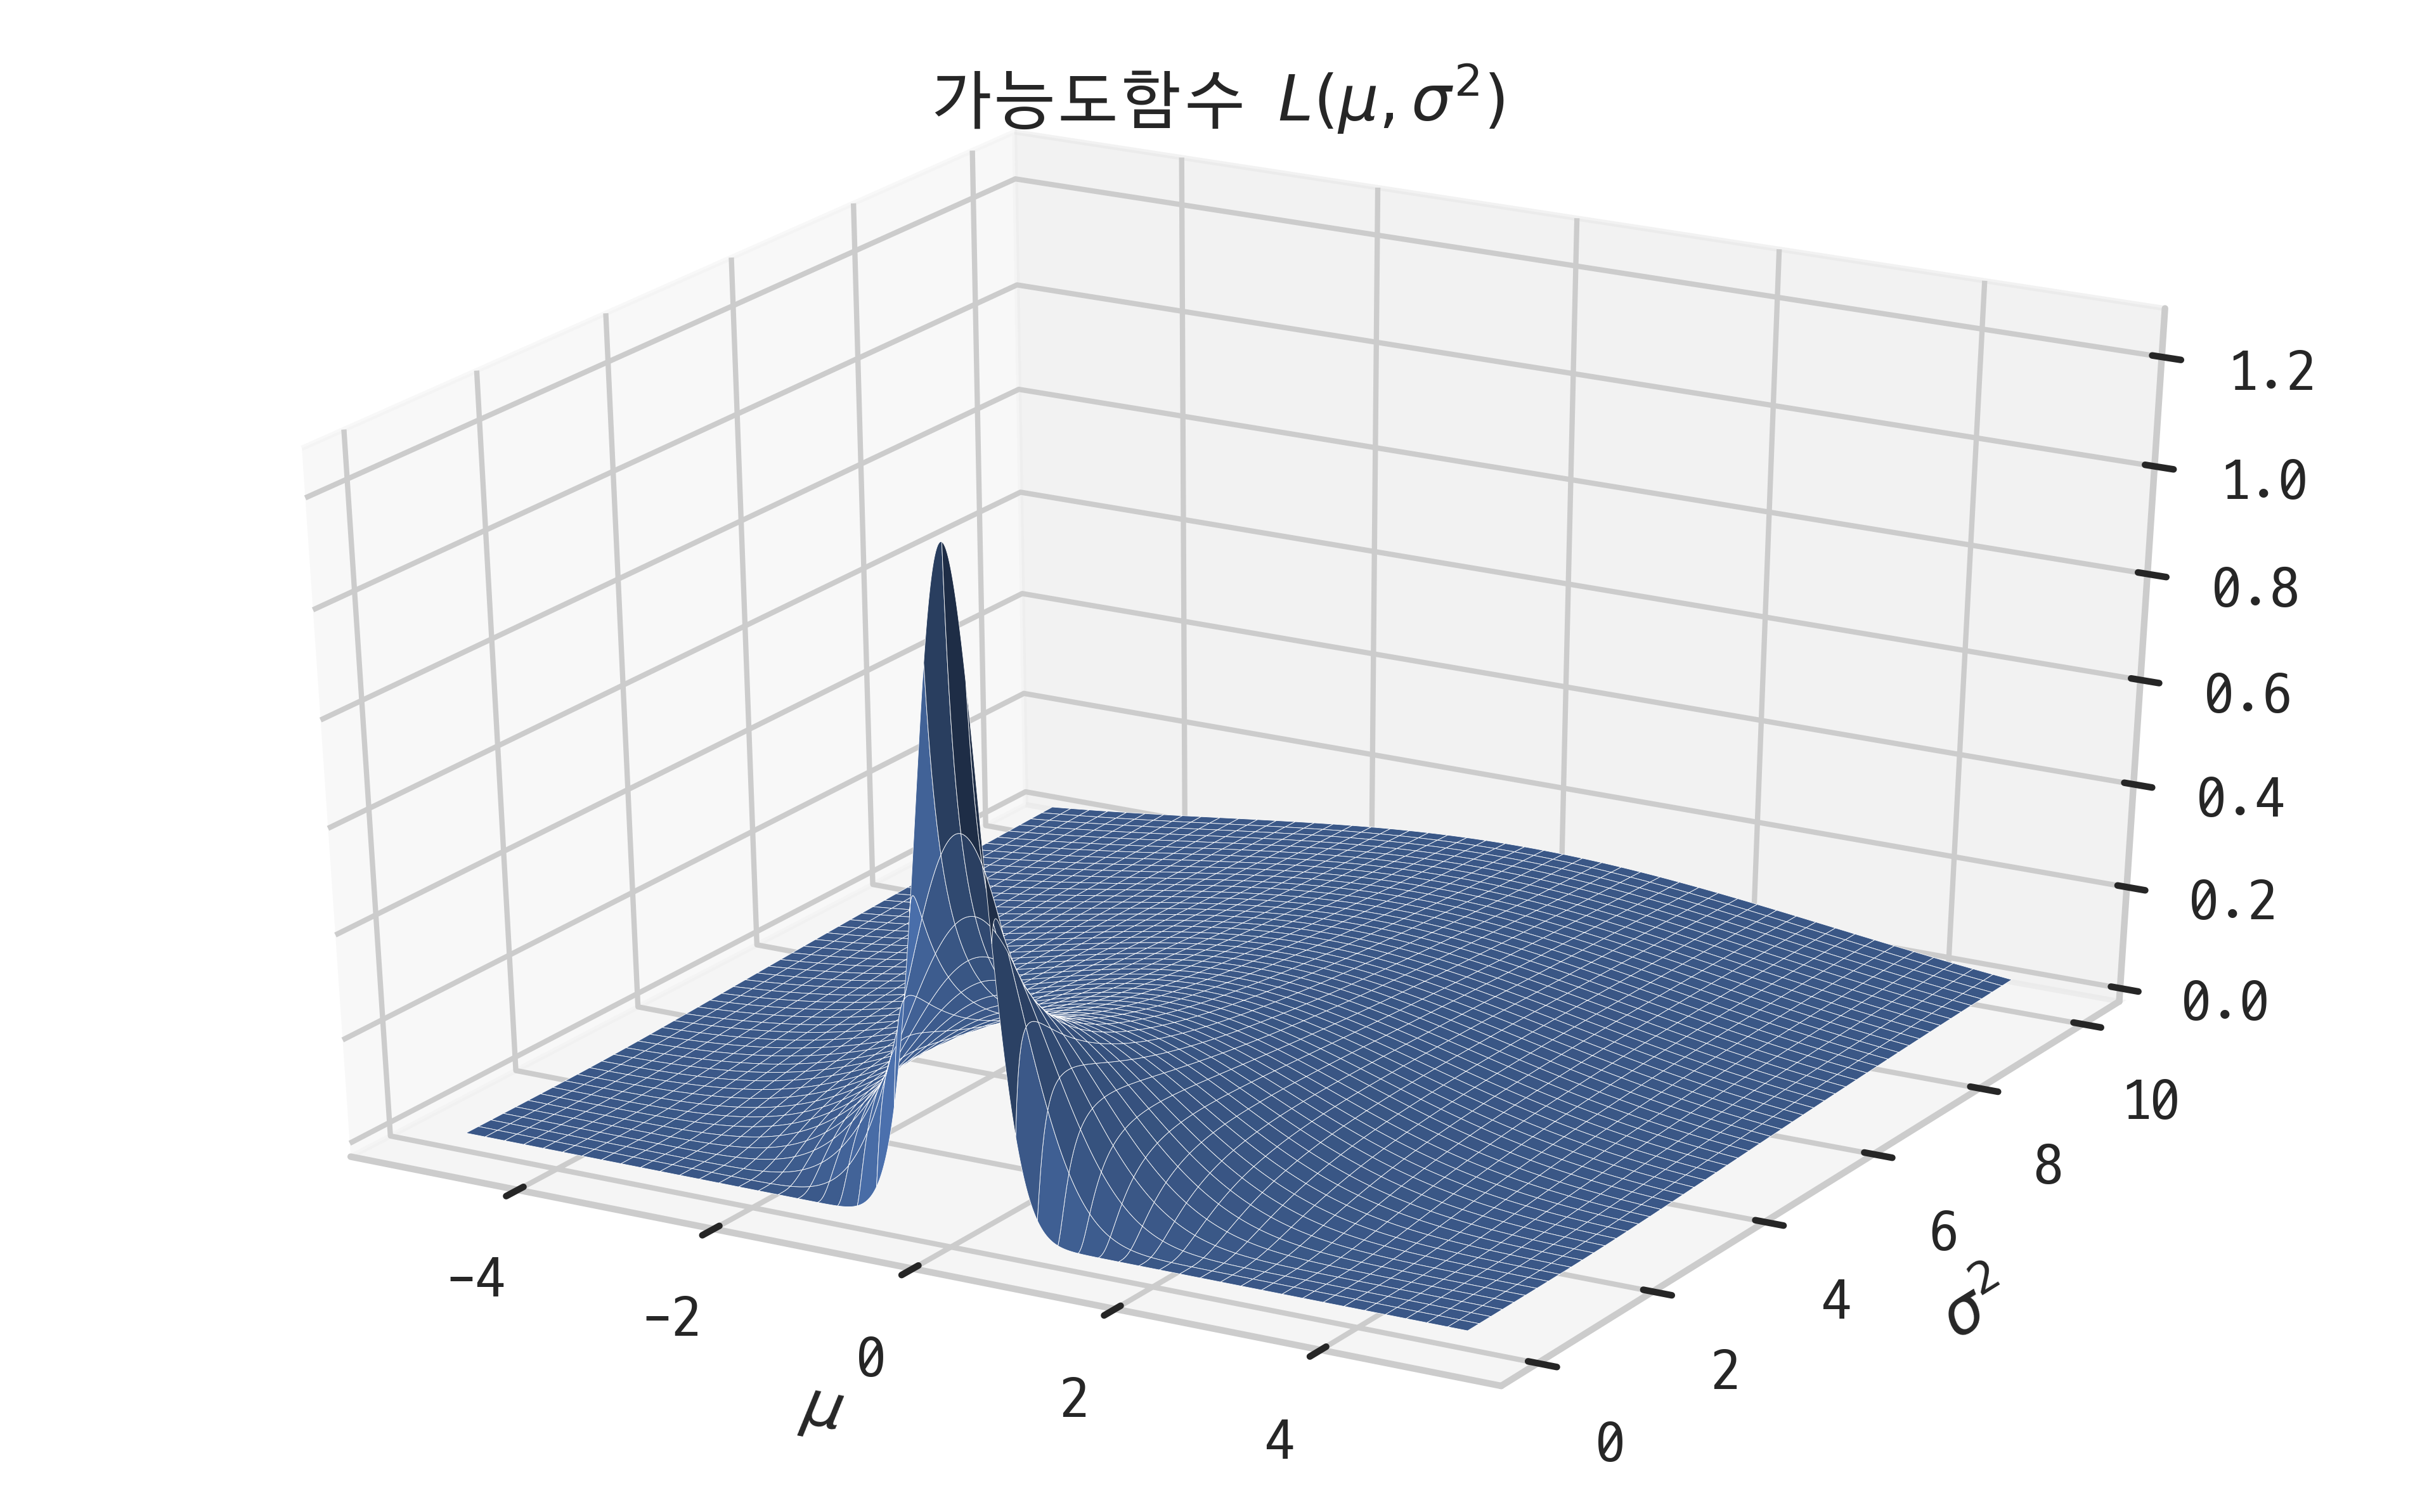

In [4]:
MU, SIGMA2 = np.meshgrid(mus, sigma2s)
L = np.exp(-MU ** 2 / (2 * SIGMA2)) / np.sqrt(2 * np.pi * SIGMA2)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(MU, SIGMA2, L, linewidth=0.1)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma^2$")
plt.title("가능도함수 $L(\mu, \sigma^2)$")
plt.show()

#### 최대가능도 추정법

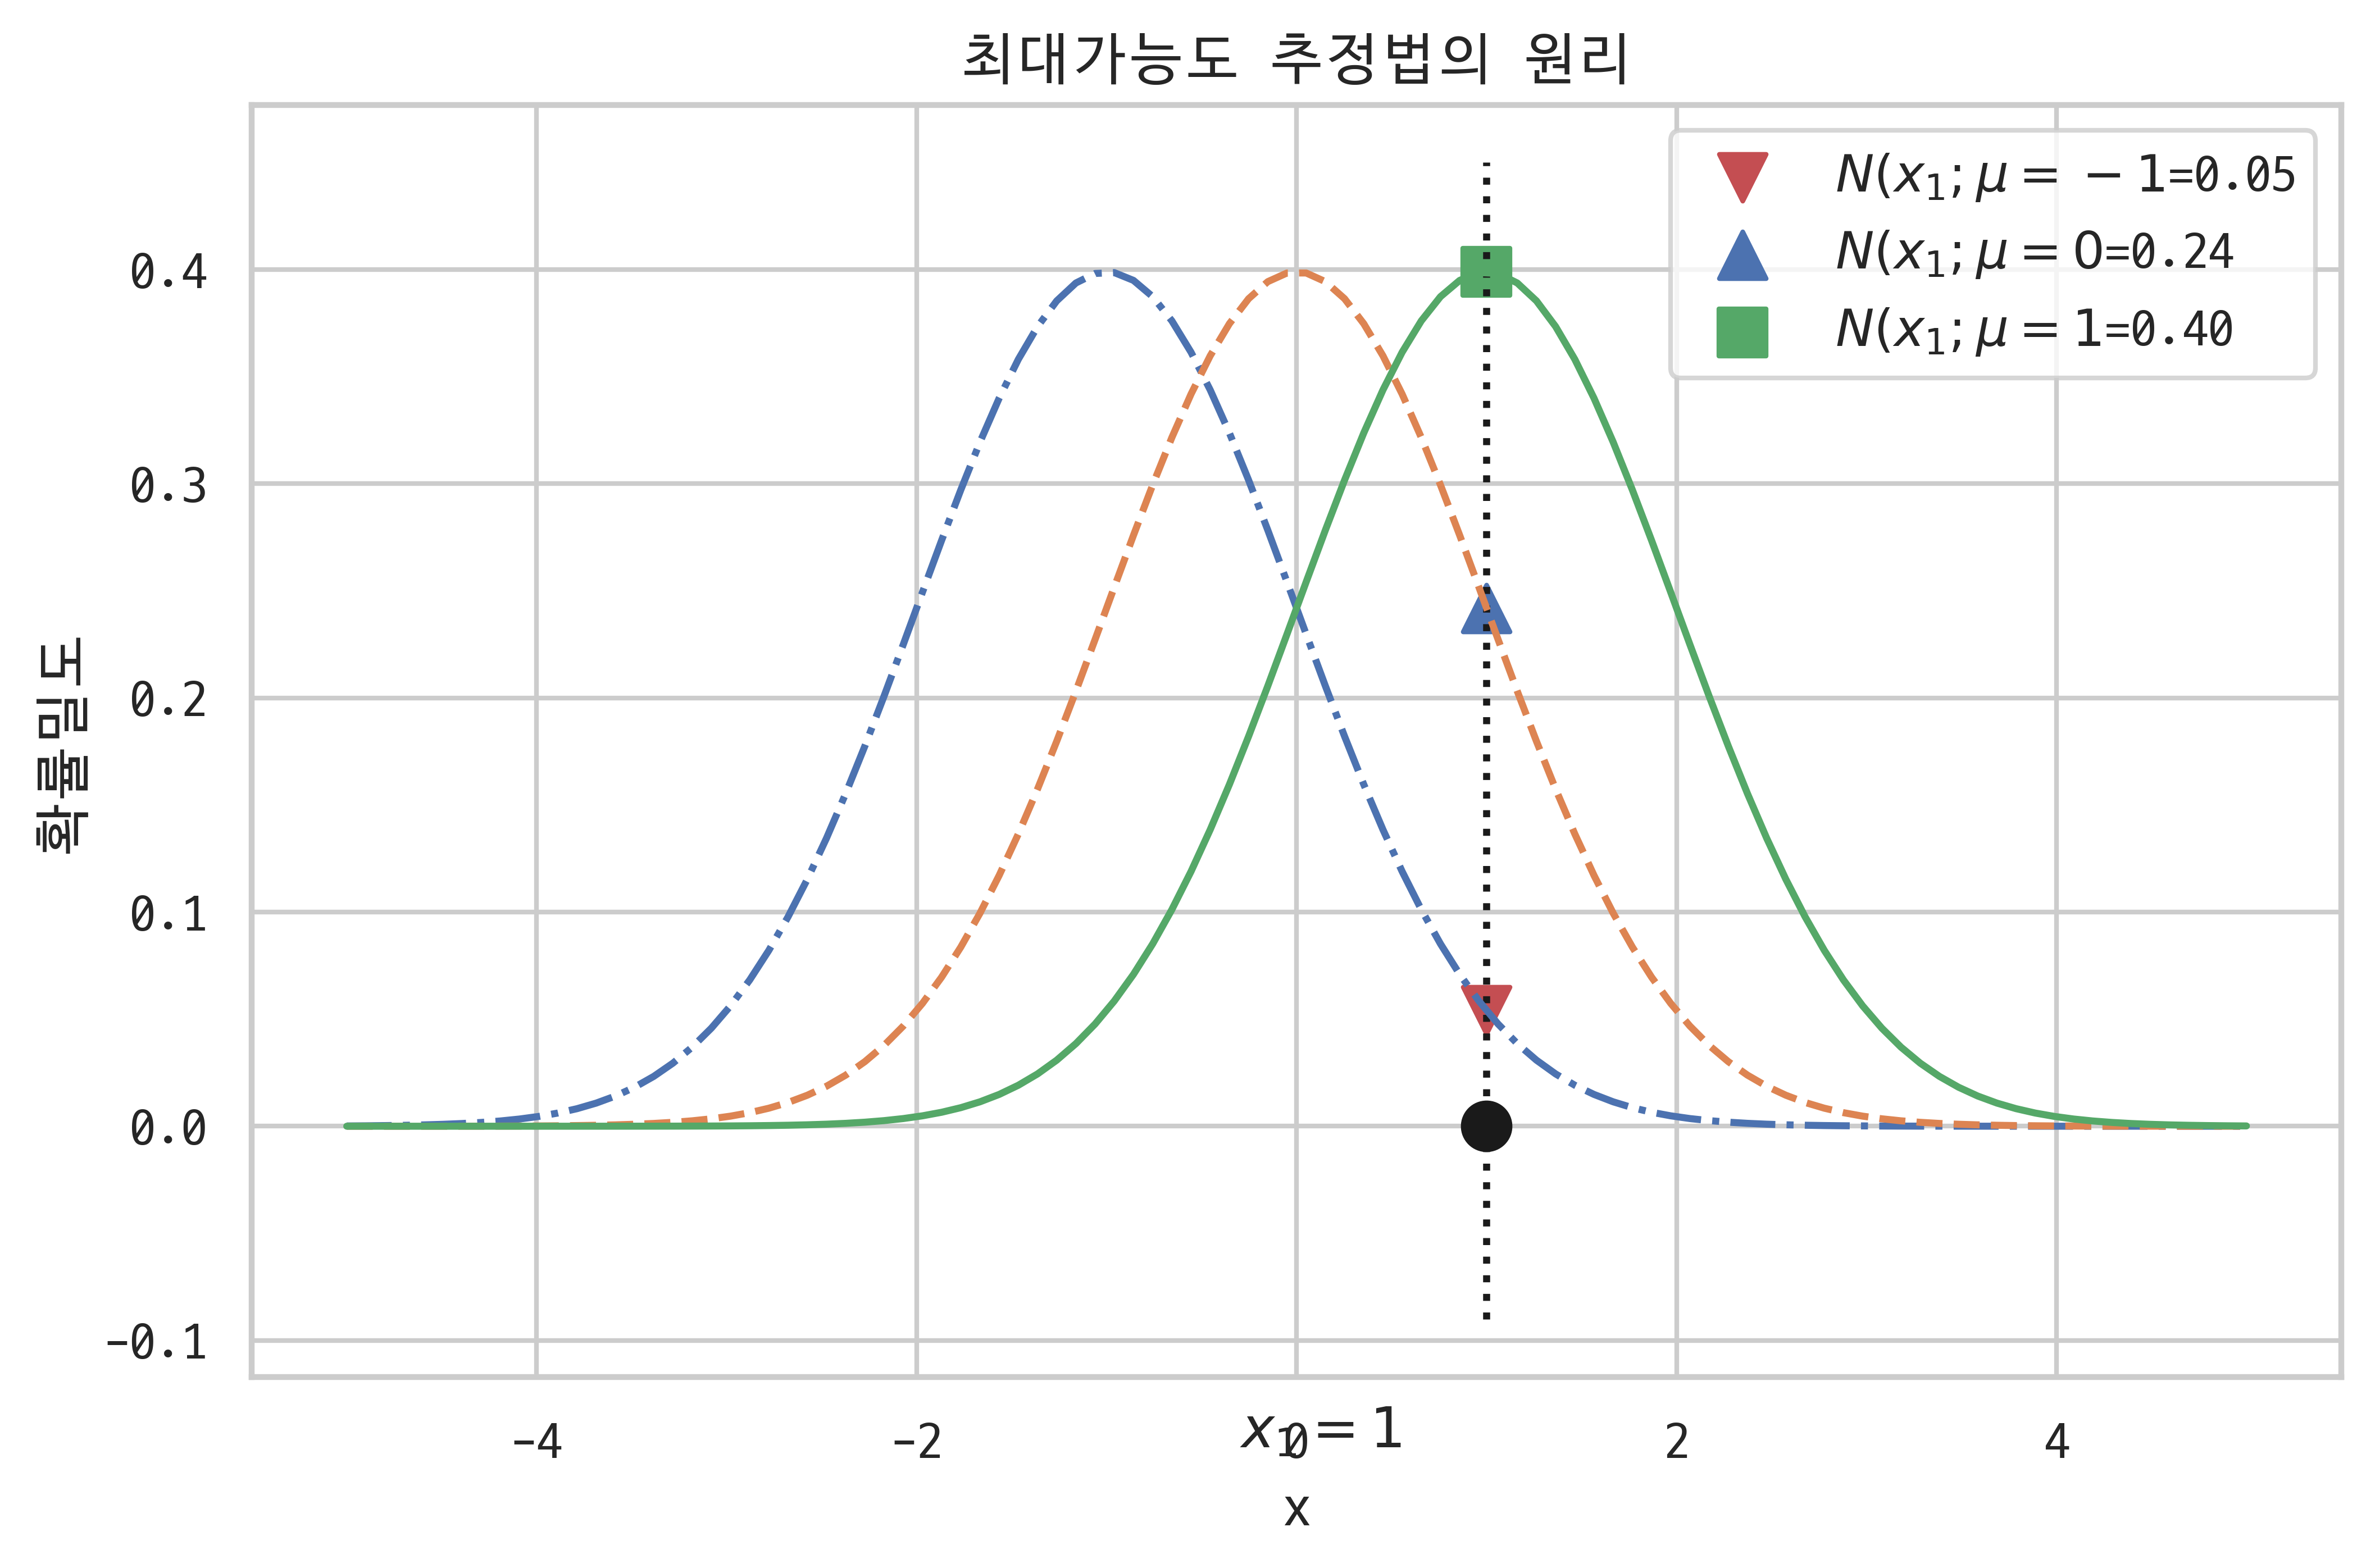

In [5]:
x = np.linspace(-5, 5, 100)

p1 = sp.stats.norm(loc=-1).pdf(1)
p2 = sp.stats.norm(loc=0).pdf(1)
p3 = sp.stats.norm(loc=1).pdf(1)

plt.scatter(1, p1, s=100, c='r', marker='v', label=r"$N(x_1;\mu=-1$={:.2f}".format(np.round(p1, 2)))
plt.scatter(1, p2, s=100, c='b', marker='^', label=r"$N(x_1;\mu=0$={:.2f}".format(np.round(p2, 2)))
plt.scatter(1, p3, s=100, c='g', marker='s', label=r"$N(x_1;\mu=1$={:.2f}".format(np.round(p3, 2)))

plt.plot(x, sp.stats.norm(loc=-1).pdf(x), ls="-.")
plt.plot(x, sp.stats.norm(loc=0).pdf(x), ls="--")
plt.plot(x, sp.stats.norm(loc=1).pdf(x), ls="-")
plt.scatter(1, 0, s=100, c='k')
plt.vlines(1, -0.09, 0.45, linestyle=":")
plt.text(-0.3, -0.15, "$x_1=1$")
plt.xlabel("x")
plt.ylabel("확률밀도")
plt.legend()
plt.title("최대가능도 추정법의 원리")
plt.show()

#### 복수의 표본 데이터가 있는 경우의 가능도함수

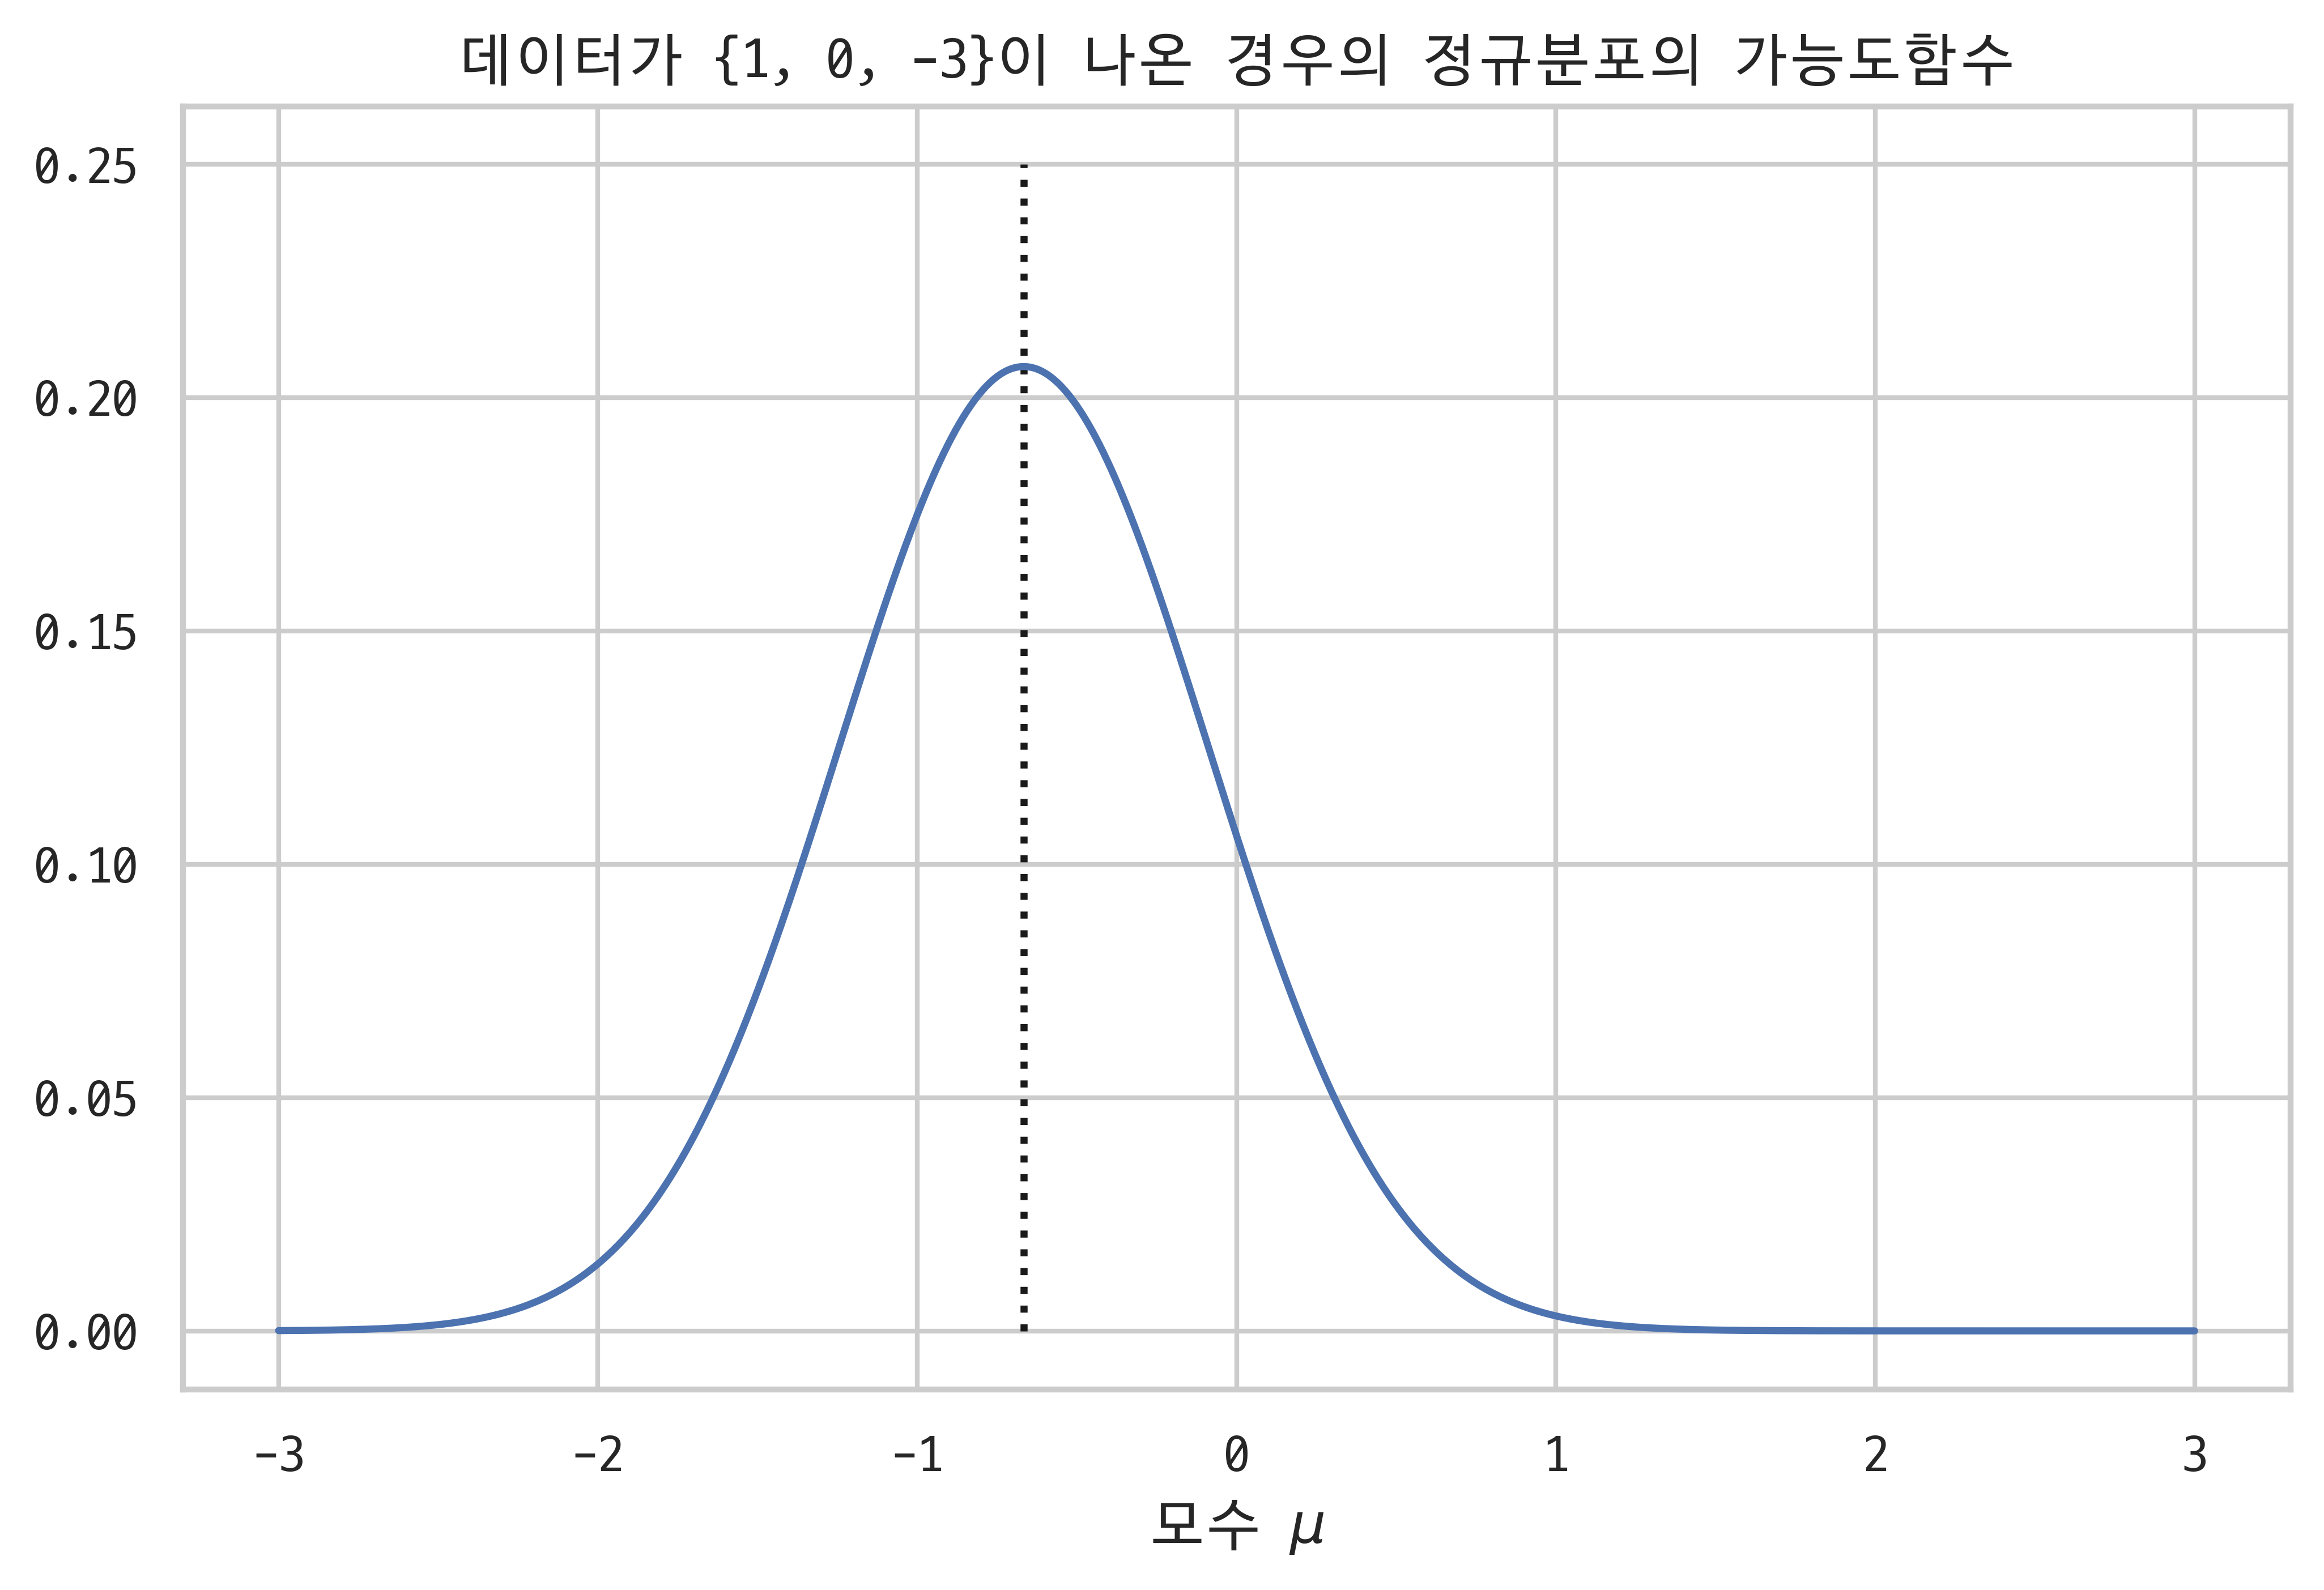

In [7]:
mu= np.linspace(-3, 3, 1000)
sigma2 = 1

def likelihood(mu):
    return (2 * np.pi * sigma2) ** (3/2) * np.exp(-(3 * mu ** 2 + 4 * mu + 10) / (2 * sigma2))

li = likelihood(mu)

plt.plot(mu, li)
plt.vlines(-2/3, 0, 0.25, linestyles=":")
plt.xlabel(r"모수 $\mu$")
plt.title("데이터가 {1, 0, -3}이 나온 경우의 정규분포의 가능도함수")
plt.show()